In [7]:
import sys

sys.path.insert(0, "/home/twright/Documents/PhD/Notebooks")

In [8]:
%display latex
from lbuc import *
from flowstar import *
from lbuc.bondcalculus import *

In [9]:
R.<x1,x2> = RIF[]

In [10]:
y = vector([-x2, x1])

In [11]:
y

(-x2, x1)

In [12]:
table([[yi] for yi in y])

""
""


In [13]:
y0 = [
    RIF('[1.9, 2.1]'),
    RIF('[1.9, 2.1]'),
]

In [14]:
table([y0i.endpoints() for y0i in y0])

,
,


In [15]:
R

Multivariate Polynomial Ring in x1, x2 over Real Interval Field with 53 bits of precision

In [16]:
sys = System(R, R.gens(), y0, y); sys

System(R, (x1, x2), [[1.8999999999999999 .. 2.1000000000000001], [1.8999999999999999 .. 2.1000000000000001]], (-x2, x1), varmap=bidict({'x1': x1, 'x2': x2}))

In [17]:
RReal = RR['x1', 'x2']

In [18]:
RReal(sys.y[1])

x1

In [19]:
sys_real = System(
    RReal,
    RReal.gens(),
    [y0i.center() for y0i in sys.y0],
    [RReal(yi) for yi in sys.y],
)
sys_real

System(R, (x1, x2), [2, 2], (-x2, x1), varmap=bidict({'x1': x1, 'x2': x2}))

In [20]:
y0_real = [y0i.center() for y0i in sys.y0]
table([[y0i] for y0i in y0_real])

""
""


In [21]:
timepoints = srange(0,10,0.1)

In [22]:
sln = desolve_odeint(sys_real.y, y0_real, timepoints, list(sys_real.x))

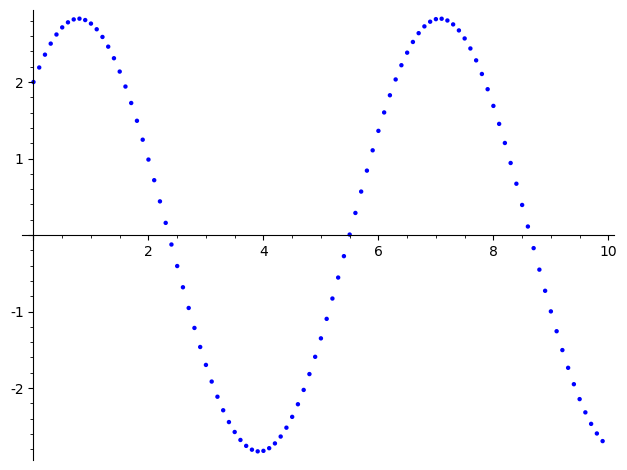

In [23]:
points(zip(timepoints, [yi[1] for yi in sln]))

In [24]:
from scipy.integrate import solve_ivp
from lbuc.matricies import vec_to_numpy, mat_to_numpy, convert_vec, sympy_gens

In [25]:
f = vec_to_numpy(RReal, sys_real.y)
jac = mat_to_numpy(RReal, sage.jacobian(sys_real.y, sys_real.x))

In [26]:
sln = solve_ivp(f,
                (0, 10),
                y0_real,
                method='LSODA',
                jac=jac,
                vectorized=True,
                dense_output=True)

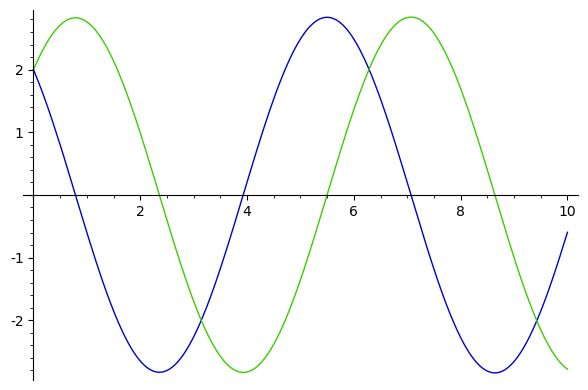

In [27]:
plot((lambda t: sln.sol(t)[0], lambda t: sln.sol(t)[1]), (0, 10))

In [28]:
import time
t0 = time.time()
r = sys.reach(
    3, order=4, step=0.003,
    precondition=1,
    estimation=1e-1,
    max_remainder_queue=200,
    integration_method=IntegrationMethod.ONLY_PICARD_SYMB,
    cutoff_threshold=1e-6,
    verbosity=3)
t1 = time.time()
print(f"Reachability done in {t1 - t0}")

calling reach with y0 = ['[1.8999999999999999 .. 2.1000000000000001]', '[1.8999999999999999 .. 2.1000000000000001]']
ode in polynomial ring
entering managed function _init_args
entering global manager
num_flowpipes [reported]: 0
num_flowpipes: 0
global num_flowpipes: 0 flowpipes
system with dimension 0
swapping variables
=== before ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 0 flowpipes
global [external]: 0 flowpipes
stored: -1674040768 flowpipes
=== after ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: -1674040768 flowpipes
global [external]: -1674040768 flowpipes
stored: 0 flowpipes
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f413b71fd60>]
num_flowpipes [reported]: -1674040768
global num_flowpipes: -1674040768 flowpipes
num_flowpipes: 0
system with dimension 0
crude_roots = False
_handle_initials called!
vars = [x1, x2]
C = [1.9..2.1]
C = [1.9..2.1]
assigning system with dimension 2
resulting system has dimension

In [29]:
%load_ext cython

In [30]:
%%cython -+ -l flowstar -l mpfr -l gmp -l gsl -l gslcblas -l m -l glpk -L .. -L ../flowstar/ -L ../lbuc/ -L ../flowstar/flowstar-2.1.0 -L /usr/include/boost -I .. -I ../flowstar/ -I ../lbuc/ -I ../flowstar/flowstar-2.1.0 -I /usr/include/boost -c=-O3 -c=-std=c++17 -c=-Wno-register -c=-march=native -c=-mtune=native

from flowstar.global_manager cimport FlowstarGlobalManager
from flowstar.instrumentation import AggregateMetric
from flowstar.Continuous cimport ContinuousReachability
from flowstar.modelParser cimport globalNumFlowpipes, continuousProblem, swapContinuousProblem

metric = AggregateMetric()
gm = FlowstarGlobalManager(metric)

cdef ContinuousReachability cr

print(f"global num_flowpipes = {globalNumFlowpipes()}")
cr.num_of_flowpipes = 42
print(f"num_flowpipes = {cr.numOfFlowpipes()}")
swapContinuousProblem(cr)
print("swapped CPs")
print(f"global num_flowpipes = {globalNumFlowpipes()}")
print(f"num_flowpipes = {cr.numOfFlowpipes()}")


# print(f"num_flowpipes = {cr.numOfFlowpipes()}")

# with gm:
#     print(f"num_flowpipes = {cr.numOfFlowpipes()}")

metric.print()

global num_flowpipes = 0
num_flowpipes = 42
swapped CPs
global num_flowpipes = 42
num_flowpipes = 0


In [31]:
%%cython -+ -l flowstar -l mpfr -l gmp -l gsl -l gslcblas -l m -l glpk -L .. -L ../flowstar/ -L ../lbuc/ -L ../flowstar/flowstar-2.1.0 -L /usr/include/boost -I .. -I ../flowstar/ -I ../lbuc/ -I ../flowstar/flowstar-2.1.0 -I /usr/include/boost -c=-O3 -c=-std=c++17 -c=-Wno-register -c=-march=native -c=-mtune=native

from flowstar.global_manager cimport FlowstarGlobalManager
from flowstar.instrumentation import AggregateMetric
from flowstar.Continuous cimport ContinuousReachability
from flowstar.modelParser cimport globalNumFlowpipes, continuousProblem, swapContinuousProblem

metric = AggregateMetric()
gm = FlowstarGlobalManager(metric)

cdef ContinuousReachability cr

continuousProblem.num_of_flowpipes = 72

with gm:
    continuousProblem.num_of_flowpipes = 42
    print(f"global num_flowpipes [inside gm] = {globalNumFlowpipes()}")
    
print(f"global num_flowpipes [outside gm] = {globalNumFlowpipes()}")

with gm:
    print(f"global num_flowpipes [inside gm again] = {globalNumFlowpipes()}")
    
metric.print()

entering global manager
num_flowpipes [reported]: 42
num_flowpipes: 0
global num_flowpipes: 42 flowpipes
system with dimension 0
swapping variables
=== before ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 42 flowpipes
global [external]: 42 flowpipes
stored: 1702258028 flowpipes
=== after ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 1702258028 flowpipes
global [external]: 1702258028 flowpipes
stored: 0 flowpipes
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f413879ae10>]
num_flowpipes [reported]: 1702258028
global num_flowpipes: 1702258028 flowpipes
num_flowpipes: 0
system with dimension 0
global num_flowpipes [inside gm] = 42
exiting global manager
num_flowpipes [reported]: 1702258028
global num_flowpipes: 1702258028 flowpipes
num_flowpipes: 0
system with dimension 0
swapping variables
=== before ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 1702258028 flowpipes
global [external]: 1702258028 

In [32]:
%%cython -+ -l flowstar -l mpfr -l gmp -l gsl -l gslcblas -l m -l glpk -L .. -L ../flowstar/ -L ../lbuc/ -L ../flowstar/flowstar-2.1.0 -L /usr/include/boost -I .. -I ../flowstar/ -I ../lbuc/ -I ../flowstar/flowstar-2.1.0 -I /usr/include/boost -c=-O3 -c=-std=c++17 -c=-Wno-register -c=-march=native -c=-mtune=native

#from flowstar.global_manager cimport FlowstarGlobalManager
from flowstar.instrumentation import AggregateMetric
from flowstar.Continuous cimport ContinuousReachability, domainVarNames
from flowstar.Polynomial cimport (Polynomial, power_4, double_factorial,
                                  factorial_rec)
from flowstar.modelParser cimport globalNumFlowpipes, continuousProblem, swapContinuousProblem
from libcpp.vector cimport vector
from flowstar.Interval cimport Interval
import instrument
cimport flowstar.interval as interval
from libcpp.string cimport string

global_manager_stack = []


cdef class FlowstarGlobalManager:
    cdef ContinuousReachability* continuousProblem
    cdef previous_global_manager
    cdef vector[Interval] factorial_rec
    cdef vector[Interval] power_4
    cdef vector[Interval] double_factorial
    cdef vector[string] domainVarNames
    cdef readonly object instrumentor
    cdef readonly int entry_count


    def __cinit__(FlowstarGlobalManager self,
        instrumentor):
        self.continuousProblem = new ContinuousReachability()
        self.entry_count = 0
        self.instrumentor = instrumentor

    def __dealloc__(self):
        del self.continuousProblem

    @property
    def active(self):
        global global_manager_stack

        return (global_manager_stack and 
            global_manager_stack[-1] is self)

    @staticmethod
    def get_global_domain_var_names():
        global domainVarNames

        return [str(name) for name in domainVarNames]

    @staticmethod
    def get_global_factorial_rec():
        global factorial_rec
        return interval.intervals_to_list(factorial_rec)

    @staticmethod
    def get_global_power_4():
        global power_4
        return interval.intervals_to_list(power_4)

    @staticmethod
    def get_global_double_factorial():
        global double_factorial
        return interval.intervals_to_list(double_factorial)

    @staticmethod
    def clear_globals():
        global factorial_rec
        global power_4
        global double_factorial
        global domainVarNames
        global continuousProblem

        factorial_rec.clear()
        power_4.clear()
        double_factorial.clear()
        domainVarNames.clear()

    def swap_globals(FlowstarGlobalManager self):
        '''Swap the flowstar global variables for those stored in this manager.'''
        global factorial_rec
        global power_4
        global double_factorial
        global domainVarNames
        global continuousProblem

        print("swapping variables")
        print("=== before ===")
        print(f"global: {continuousProblem.system.tmvOde.tms.size()} dim")
        print(f"local: {self.continuousProblem.system.tmvOde.tms.size()} dim")
        print(f"global: {continuousProblem.flowpipes.size()} flowpipes")
        print(f"global [reported]: {continuousProblem.numOfFlowpipes()} flowpipes")
        print(f"global [external]: {globalNumFlowpipes()} flowpipes")
        print(f"stored: {self.continuousProblem[0].numOfFlowpipes()} flowpipes")
        swapContinuousProblem(self.continuousProblem[0])
        self.domainVarNames.swap(domainVarNames)
        self.factorial_rec.swap(factorial_rec)
        self.double_factorial.swap(double_factorial)
        print("=== after ===")
        print(f"global: {continuousProblem.system.tmvOde.tms.size()} dim")
        print(f"local: {self.continuousProblem.system.tmvOde.tms.size()} dim")
        print(f"global: {continuousProblem.flowpipes.size()} flowpipes")
        print(f"global [reported]: {continuousProblem.numOfFlowpipes()} flowpipes")
        print(f"global [external]: {globalNumFlowpipes()} flowpipes")
        print(f"stored: {self.continuousProblem[0].flowpipes.size()} flowpipes")

    def clear(self):
        print(f"{repr(self)} clearing")
        if self.active:
            self.clear_globals()
        else:
            self.domainVarNames.clear()
            self.factorial_rec.clear()
            self.power_4.clear()
            self.double_factorial.clear()

    def __enter__(self):
        global global_manager_stack
        global continuousProblem

        print("entering global manager")
        print(f"num_flowpipes [reported]: {continuousProblem.numOfFlowpipes()}")
        print(f"num_flowpipes: {continuousProblem.flowpipes.size()}")
        print(f"global num_flowpipes: {globalNumFlowpipes()} flowpipes")
        print(f"system with dimension {continuousProblem.system.tmvOde.tms.size()}")

        if not self.active:
            with instrument.block(
                    name="restoring globals",
                    metric=self.instrumentor.metric):
                self.swap_globals()

        global_manager_stack.append(self)
        assert self.active
        print(f"stack: {global_manager_stack}")
        print(f"num_flowpipes [reported]: {continuousProblem.numOfFlowpipes()}")
        print(f"global num_flowpipes: {globalNumFlowpipes()} flowpipes")
        print(f"num_flowpipes: {continuousProblem.flowpipes.size()}")
        print(f"system with dimension {continuousProblem.system.tmvOde.tms.size()}")

    def __exit__(self, exc_type, exc_val, exc_tb):
        global global_manager_stack
        global continuousProblem

        print("exiting global manager")
        print(f"num_flowpipes [reported]: {continuousProblem.numOfFlowpipes()}")
        print(f"global num_flowpipes: {globalNumFlowpipes()} flowpipes")
        print(f"num_flowpipes: {continuousProblem.flowpipes.size()}")
        print(f"system with dimension {continuousProblem.system.tmvOde.tms.size()}")

        assert self.active
        global_manager_stack.pop()

        if not self.active:
            with instrument.block(
                    name="capturing globals [on exit]",
                    metric=self.instrumentor.metric):
                self.swap_globals()

        print(f"stack: {global_manager_stack}")
        print(f"num_flowpipes [reported]: {continuousProblem.numOfFlowpipes()}")
        print(f"global num_flowpipes: {globalNumFlowpipes()} flowpipes")
        print(f"num_flowpipes: {continuousProblem.flowpipes.size()}")
        print(f"system with dimension {continuousProblem.system.tmvOde.tms.size()}")

metric = AggregateMetric()
gm = FlowstarGlobalManager(metric)


cdef ContinuousReachability cr

continuousProblem.num_of_flowpipes = 72

with gm:
    continuousProblem.num_of_flowpipes = 42
    print(f"global num_flowpipes [inside gm] = {globalNumFlowpipes()}")
    
print(f"global num_flowpipes [outside gm] = {globalNumFlowpipes()}")

with gm:
    print(f"global num_flowpipes [inside gm again] = {globalNumFlowpipes()}")
    
metric.print()

entering global manager
num_flowpipes [reported]: 72
num_flowpipes: 0
global num_flowpipes: 72 flowpipes
system with dimension 0
swapping variables
=== before ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 72 flowpipes
global [external]: 72 flowpipes
stored: 118 flowpipes
=== after ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 118 flowpipes
global [external]: 118 flowpipes
stored: 0 flowpipes
stack: [<_cython_magic_88aa809966fc0db05a129cfca4a91a33.FlowstarGlobalManager object at 0x7f4138f38f70>]
num_flowpipes [reported]: 118
global num_flowpipes: 118 flowpipes
num_flowpipes: 0
system with dimension 0
global num_flowpipes [inside gm] = 42
exiting global manager
num_flowpipes [reported]: 42
global num_flowpipes: 42 flowpipes
num_flowpipes: 0
system with dimension 0
swapping variables
=== before ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 42 flowpipes
global [external]: 42 flowpipes
stored: 72 flowpipes
=== after ===

In [33]:
%%cython -f -+ -l flowstar -l mpfr -l gmp -l gsl -l gslcblas -l m -l glpk -L .. -L ../flowstar/ -L ../lbuc/ -L ../flowstar/flowstar-2.1.0 -L /usr/include/boost -I .. -I ../flowstar/ -I ../lbuc/ -I ../flowstar/flowstar-2.1.0 -I /usr/include/boost -c=-O3 -c=-std=c++17 -c=-Wno-register -c=-march=native -c=-mtune=native

from flowstar.global_manager cimport FlowstarGlobalManager, global_continuous_problem
from flowstar.instrumentation import AggregateMetric
from flowstar.Continuous cimport ContinuousReachability
from flowstar.modelParser cimport globalNumFlowpipes, swapContinuousProblem

metric = AggregateMetric()
gm = FlowstarGlobalManager(metric)

cdef ContinuousReachability* continuousProblem = global_continuous_problem()

continuousProblem.num_of_flowpipes = 72

with gm:
    continuousProblem.num_of_flowpipes = 42
    print(f"global num_flowpipes [inside gm] = {globalNumFlowpipes()}")
    
print(f"global num_flowpipes [outside gm] = {globalNumFlowpipes()}")

with gm:
    print(f"global num_flowpipes [inside gm again] = {globalNumFlowpipes()}")
    
metric.print()

ImportError: /home/twright/.cache/ipython/cython/_cython_magic_17a6ca7063a03a09589efc977452cf16.cpython-37m-x86_64-linux-gnu.so: undefined symbol: global_continuous_problem

In [23]:
fl = lambda t: r(RIF(t))[0].lower()
fu = lambda t: r(RIF(t))[0].upper()
gl = lambda t: r(RIF(t))[1].lower()
gu = lambda t: r(RIF(t))[1].upper()

entering managed function __call__
entering global manager
num_flowpipes [reported]: 0
num_flowpipes: 0
global num_flowpipes: 0 flowpipes
system with dimension 0
swapping variables
=== before ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 0 flowpipes
global [external]: 0 flowpipes
stored: 1 flowpipes
=== after ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 1 flowpipes
global [external]: 1 flowpipes
stored: 0 flowpipes
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
gl

num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
swapping variables
=== before ===
global

system with dimension 0
swapping variables
=== before ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 0 flowpipes
global [external]: 0 flowpipes
stored: 1 flowpipes
=== after ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 1 flowpipes
global [external]: 1 flowpipes
stored: 0 flowpipes
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flo

=== before ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 0 flowpipes
global [external]: 0 flowpipes
stored: 1 flowpipes
=== after ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 1 flowpipes
global [external]: 1 flowpipes
stored: 0 flowpipes
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system

global [external]: 0 flowpipes
stored: 0 flowpipes
stack: []
num_flowpipes [reported]: 0
global num_flowpipes: 0 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 0
num_flowpipes: 0
global num_flowpipes: 0 flowpipes
system with dimension 0
swapping variables
=== before ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 0 flowpipes
global [external]: 0 flowpipes
stored: 1 flowpipes
=== after ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 1 flowpipes
global [external]: 1 flowpipes
stored: 0 flowpipes
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.glob

num_flowpipes: 0
system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 0
num_flowpipes: 0
global num_flowpipes: 0 flowpipes
system with dimension 0
swapping variables
=== before ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 0 flowpipes
global [external]: 0 flowpipes
stored: 1 flowpipes
=== after ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 1 flowpipes
global [external]: 1 flowpipes
stored: 0 flowpipes
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7

global [external]: 0 flowpipes
stored: 0 flowpipes
stack: []
num_flowpipes [reported]: 0
global num_flowpipes: 0 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 0
num_flowpipes: 0
global num_flowpipes: 0 flowpipes
system with dimension 0
swapping variables
=== before ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 0 flowpipes
global [external]: 0 flowpipes
stored: 1 flowpipes
=== after ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 1 flowpipes
global [external]: 1 flowpipes
stored: 0 flowpipes
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.glob

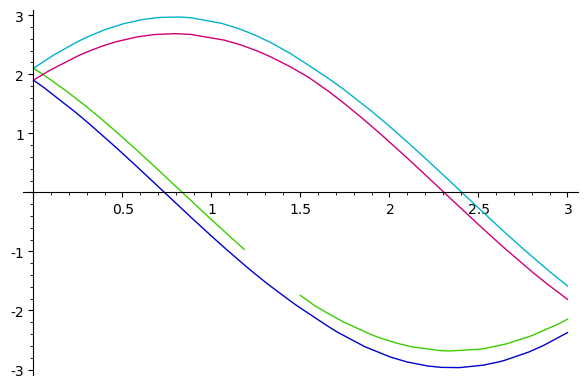

In [24]:
plot((fl, fu, gl, gu), (0, 3), plot_points=30, adaptive_recursion=0, randomize=False)

In [25]:
from flowstar.observers import PolyObserver

In [26]:
p = PolyObserver(x1, r)

PolyObserver(x1, <flowstar.reachability.Reach object at 0x7fe7fbe289b0>, None symbolic_composition=False, tentative_unpreconditioning=False, mask=None)
entering managed function prepare
entering global manager
num_flowpipes [reported]: 0
num_flowpipes: 0
global num_flowpipes: 0 flowpipes
system with dimension 0
swapping variables
=== before ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 0 flowpipes
global [external]: 0 flowpipes
stored: 1 flowpipes
=== after ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 1 flowpipes
global [external]: 1 flowpipes
stored: 0 flowpipes
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
swapping variables
=== before ===
global: 0 dim
local: 0 dim
global: 0

In [27]:
r.num_flowpipes

entering global manager
num_flowpipes [reported]: 0
num_flowpipes: 0
global num_flowpipes: 0 flowpipes
system with dimension 0
swapping variables
=== before ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 0 flowpipes
global [external]: 0 flowpipes
stored: 1 flowpipes
=== after ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 1 flowpipes
global [external]: 1 flowpipes
stored: 0 flowpipes
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
swapping variables
=== before ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 1 flowpipes
global [external]: 1 flowpipes
stored: 0 flowpipes
=== after ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 0 flowpipes
g

1000

In [28]:
r.num_flowpipes

entering global manager
num_flowpipes [reported]: 0
num_flowpipes: 0
global num_flowpipes: 0 flowpipes
system with dimension 0
swapping variables
=== before ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 0 flowpipes
global [external]: 0 flowpipes
stored: 1 flowpipes
=== after ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 1 flowpipes
global [external]: 1 flowpipes
stored: 0 flowpipes
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
swapping variables
=== before ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 1 flowpipes
global [external]: 1 flowpipes
stored: 0 flowpipes
=== after ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 0 flowpipes
g

1000

In [29]:
dir(SageObserver)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_fprime_given_f',
 '_init_stored_data',
 'check',
 'f',
 'fprime',
 'global_manager',
 'mask',
 'reach',
 'roots',
 'roots_global',
 'symbolic_composition',
 'system',
 'tentative_unpreconditioning',
 'time',
 'with_f',
 'with_mask']

In [30]:
r(RIF(1))[0].str(style='brackets')

entering managed function __call__
entering global manager
num_flowpipes [reported]: 0
num_flowpipes: 0
global num_flowpipes: 0 flowpipes
system with dimension 0
swapping variables
=== before ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 0 flowpipes
global [external]: 0 flowpipes
stored: 1 flowpipes
=== after ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 1 flowpipes
global [external]: 1 flowpipes
stored: 0 flowpipes
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
gl

'[-0.74068301205274801 .. -0.46399170371188513]'

In [31]:
p.global_manager

In [32]:
p.reach.global_manager

In [33]:
p(RIF(1), verbosity=3).str(style='brackets')

entering global manager
num_flowpipes [reported]: 0
num_flowpipes: 0
global num_flowpipes: 0 flowpipes
system with dimension 0
swapping variables
=== before ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 0 flowpipes
global [external]: 0 flowpipes
stored: 1 flowpipes
=== after ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 1 flowpipes
global [external]: 1 flowpipes
stored: 0 flowpipes
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
calling inner eval_interval


AssertionError: final_res should have a value

exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
swapping variables
=== before ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 1 flowpipes
global [external]: 1 flowpipes
stored: 0 flowpipes
=== after ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 0 flowpipes
global [external]: 0 flowpipes
stored: 0 flowpipes
stack: []
num_flowpipes [reported]: 0
global num_flowpipes: 0 flowpipes
num_flowpipes: 0
system with dimension 0


Exception ignored in: 'flowstar.observers.FunctionObserver.eval_interval'
AssertionError: final_res should have a value


'[0.0000000000000000 .. -0.0000000000000000]'

In [34]:
with p.global_manager:
    p.roots()

entering global manager
num_flowpipes [reported]: 0
num_flowpipes: 0
global num_flowpipes: 0 flowpipes
system with dimension 0
swapping variables
=== before ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 0 flowpipes
global [external]: 0 flowpipes
stored: 1 flowpipes
=== after ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 1 flowpipes
global [external]: 1 flowpipes
stored: 0 flowpipes
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function roots
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_f

entering managed function sage_interval_plot
entering global manager
num_flowpipes [reported]: 0
num_flowpipes: 0
global num_flowpipes: 0 flowpipes
system with dimension 0
swapping variables
=== before ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 0 flowpipes
global [external]: 0 flowpipes
stored: 1 flowpipes
=== after ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 1 flowpipes
global [external]: 1 flowpipes
stored: 0 flowpipes
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
var_id_x = -1
var_id_y = -1
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 

system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system wi

num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]

num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0

exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.

stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobal

system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system wi

system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlo

exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.

num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowp

num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system

num_flowpipes: 0
system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [report

entering managed function __call__
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes


global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object a

num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGloba

global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting gl

exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.

exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.

system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.globa

system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num

system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlo

entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_mana

exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.

num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManage

num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlo

num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGloba

num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system

exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.

entering managed function __call__
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes


exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.

num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManage

global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting gl

exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7

num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager o

global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <f

global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <f

stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipe

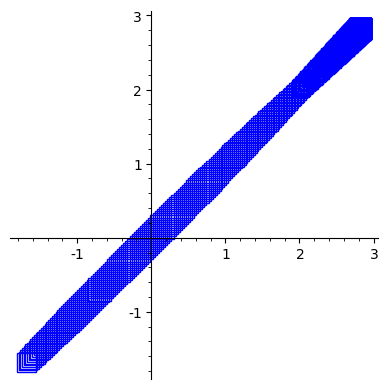

In [35]:
r.sage_interval_plot('x1', 'x2', 0.01)

entering managed function sage_interval_plot
entering global manager
num_flowpipes [reported]: 0
num_flowpipes: 0
global num_flowpipes: 0 flowpipes
system with dimension 0
swapping variables
=== before ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 0 flowpipes
global [external]: 0 flowpipes
stored: 1 flowpipes
=== after ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 1 flowpipes
global [external]: 1 flowpipes
stored: 0 flowpipes
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
var_id_x = -1
var_id_y = -1
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 

global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting gl

exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.

num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.Flowst

system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function __call__
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <

num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
entering managed function prepare
entering global manager
num_flowpipes [reported]: 1
num_flowpipes: 0
global num_flowpipes: 1 flowpipes
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGloba

stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
exiting global manager
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipes: 0
system with dimension 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7fe7fbebacb0>]
num_flowpipes [reported]: 1
global num_flowpipes: 1 flowpipes
num_flowpipe

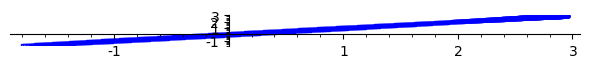

In [36]:
out = r.sage_interval_plot('x1', 'x2', 0.01)
out.set_aspect_ratio(1/18)
out

In [ ]:
r.wplot('x3', 'x5')

In [ ]:
r.wplot('x4', 'x6')

In [ ]:
sys_real.varmap

In [ ]:
fl = lambda t: r(RIF(t))[5].lower()
fu = lambda t: r(RIF(t))[5].upper()
gl = lambda t: r(RIF(t))[3].lower()
gu = lambda t: r(RIF(t))[3].upper()

In [ ]:
fl(0), fu(0)

In [ ]:
gl(0), gu(0)

In [ ]:
plot((fl, fu), (0, 3), plot_points=30, adaptive_recursion=0, randomize=False)

In [ ]:
plot((gl, gu), (0, 3), plot_points=50, adaptive_recursion=0, randomize=False)

In [ ]:
from flowstar.instrumentation import AggregateMetric

In [ ]:
agg = AggregateMetric()

In [ ]:
from time import sleep
import instrument

with instrument.block(name='test', metric=agg.metric):
    print("test A ...")
    sleep(2)

with instrument.block(name='test', metric=agg.metric):
    print("test B ...")
    sleep(3)
    
agg.print()

In [ ]:
sig = F([0, 0.5], Atomic(var("x6") > 1.4) & G([0, 0.1], Atomic(var("x6") < 1.8)  & F([0, 1], Atomic(var("x6") < 1) & Atomic(var("x4") < 0.02)))).signal(r)
sig

In [ ]:
r.instrumentor.print()

In [ ]:
sig.plot()

In [ ]:
def test_monitoring(prop, duration, **kwargs):
    t0 = time.time()
    sig = prop.signal_for_system(sys,
    duration, order=4, step=0.003,
    precondition=1,
    estimation=1e-1,
    max_remainder_queue=100,
    integration_method=IntegrationMethod.ONLY_PICARD_SYMB,
    cutoff_threshold=1e-6,
    **kwargs)
    t1 = time.time()
    print(f"Run done in {t1 - t0} sec\noptions: {repr(kwargs)}")
    return t1 - t0, sig

In [ ]:
prop = F([0, 0.5], Atomic(var("x6") > 1.4) & G([0, 0.1], Atomic(var("x6") < 1.8)  & F([0, 1], Atomic(var("x6") < 1) & Atomic(var("x4") < 0.02))))
prop

In [ ]:
test_monitoring(prop, 4, use_masks=False)[1].plot()

In [ ]:
test_monitoring(prop, 4, use_masks=True)[1].plot()

In [ ]:
test_monitoring(prop, 1, use_masks=False)[1].plot()

In [ ]:
test_monitoring(prop, 1, use_masks=True)[1].plot()

In [ ]:
test_monitoring(prop, 0, use_masks=False)[1](0)

In [ ]:
test_monitoring(prop, 0, use_masks=True)[1](0)

# Optimizing and speedup

In [ ]:
P = Atomic(var("x6") > 1.4); P

In [ ]:
sigP = test_monitoring(P, 4, use_masks=False)[1]
sigP.plot()

In [ ]:
sigP.to_mask_and().plot()

In [ ]:
Q = Atomic(var("x6") < 1); Q

In [ ]:
sigQ = test_monitoring(Q, 4, use_masks=False)[1]
sigQ.plot()

In [ ]:
sigQ = test_monitoring(Q, 4, mask=sigP.to_mask_and())[1]
sigQ.plot()

In [ ]:
sigPQ = test_monitoring(P & Q, 4, use_masks=False)[1]
sigPQ.plot()

In [ ]:
sigPQ = test_monitoring(P & Q, 4, use_masks=True)[1]
sigPQ.plot()